# dataloader

In [35]:
import random
import numpy as np
seed=42
random.seed(seed)

from tensor import *
from dataset import *

class dataloader:
    '''DataLoader class
    --------------------------------
    The purpose is to make an object out of the dataset that is split into batches and is iterable to be used in the training loop (even in the validation loop).
    
    Implementing dataloader like torch:  

    - it's iterable  
    - not indexable however  
    - no string representation  
    - it takes every batch of data in a tensor form: if we have 60000 `(1,28,28)` tensors, it's return a loader with 938 tensors where each is of dimensions `(64,1,28,28)`(last one will be `(32,1,28,28)` if we have 60000 samples). It compresses every 64 (batch_size) tensors into one tensor.  
    
    <!> next step would be to make it do parallel processing (multiprocessing) to speed up the process (only start with it when everything works right)
    
    '''


    def __init__(self, dataset, batch_size=64, shuffle=True):
        self.__dataset=dataset  
        self.__batch_size=batch_size  
        self.__shuffle = shuffle
        self.__num_samples = len(dataset)  


    # -- getters and setters --
    @property
    def dataset(self):
        return self.__dataset
    @dataset.setter
    def dataset(self, dataset):
        self.__dataset = dataset

    @property
    def batch_size(self):
        return self.__batch_size
    @batch_size.setter
    def batch_size(self, batch_size):
        self.__batch_size = batch_size
    
    @property
    def shuffle(self):
        return self.__shuffle
    @shuffle.setter
    def shuffle(self, shuffle):
        self.__shuffle = shuffle
    
    @property
    def num_samples(self):
        return self.__num_samples
    @num_samples.setter
    def num_samples(self, num_samples):
        self.__num_samples = num_samples

    # -- need to validate the setters --

    def __setattr__(self, name, value):
        '''
        validating the attribute types  (dataset must be a torch.utils.data.Dataset object, batch_size must be an integer, shuffle must be a boolean fo instance

        Handle the errors and maybe set to default parameters.        
        '''

        if name == 'dataset':
            # !!!!!!!! dont forget its abstract class !!!!!!!!!
            # if not isinstance(value, Dataset):
            #     raise TypeError('dataset must be a torch.utils.data.Dataset object')
            pass
        elif name == 'batch_size':
            if not isinstance(value, int):
                raise TypeError('batch_size must be an integer')
        elif name == 'shuffle':
            if not isinstance(value, bool):
                raise TypeError('shuffle must be a boolean')
        super().__setattr__(name, value)
        

    
    def __iter__(self):
        '''iterability
        
        each batch_size tensors that come in the dataset will be compressed in one tensor, adding one dimension at the beginning

        example:   
            * batch_size=64  
            * dataset is a `(60000, 28, 28)` tensor (each item is `(1,28,28)`)  
            * Each item of the dataloader will be a `(64, 1, 28, 28)` tensor consisting of 64 items of the dataset tensor
        '''
        shuffled_indices = list(range(self.__num_samples))
        if self.shuffle:
            random.shuffle(shuffled_indices)

        for i in range(0, self.__num_samples, self.__batch_size):
            indices = shuffled_indices[i:i+self.batch_size]

            tensor_data_list=[self.dataset[i][0] for i in indices]
            nd_data_list=[tensor_data_list[i].data for i in range(len(tensor_data_list))]

            nd_data = np.stack(nd_data_list, axis=0) #moving from 64 ndarrays of (1,28,28) to one ndarray of (64,1,28,28)
            tensor_data=Tensor(nd_data)  

            # print('<> tetsing the dataloader')
            # print('     indices:', indices)
            # print('     tensor_data_list:', tensor_data_list)
            # print('     tensor_data list item shape :', tensor_data_list[0].shape)
            # print('     tensor_data.shape:', tensor_data.shape)  
            # print('     nd_data.shape:', nd_data.shape) 

            yield tensor_data

    def __len__(self):
        return len(range(0, self.__num_samples, self.__batch_size))

    def __getitem__(self, index):
        raise TypeError('DataLoader object is not indexable')
            



In [36]:
train_data=MNIST()
test_data=MNIST(train=False)

data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists
data/MNIST/raw/t10k-images-idx3-ubyte already exists
data/MNIST/raw/train-images-idx3-ubyte.gz already exists
data/MNIST/raw/train-images-idx3-ubyte already exists
data/MNIST/raw/train-labels-idx1-ubyte.gz already exists
data/MNIST/raw/train-labels-idx1-ubyte already exists
data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists
data/MNIST/raw/t10k-labels-idx1-ubyte already exists
data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists
data/MNIST/raw/t10k-images-idx3-ubyte already exists
data/MNIST/raw/train-images-idx3-ubyte.gz already exists
data/MNIST/raw/train-images-idx3-ubyte already exists
data/MNIST/raw/train-labels-idx1-ubyte.gz already exists
data/MNIST/raw/train-labels-idx1-ubyte already exists
data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists
data/MNIST/raw/t10k-labels-idx1-ubyte already exists


In [37]:
train_loader=dataloader(train_data, batch_size=64, shuffle=True)
train_loader.batch_size, train_loader.shuffle, train_loader.num_samples

(64, True, 60000)

In [39]:
len(train_loader)

938

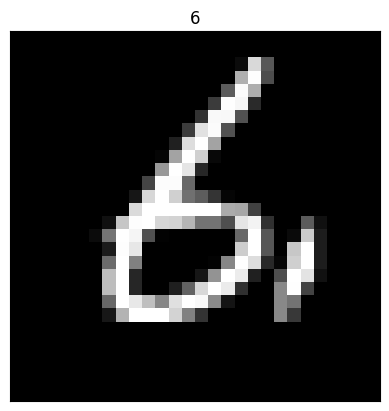

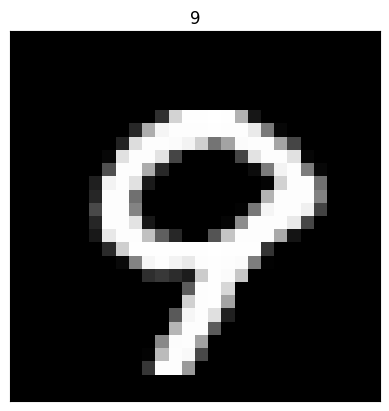

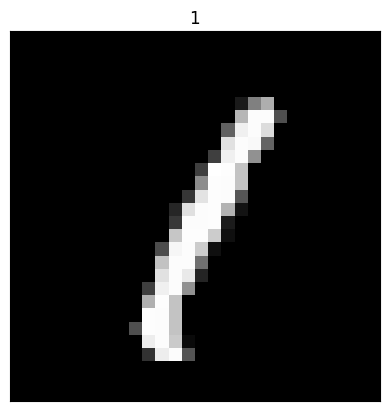

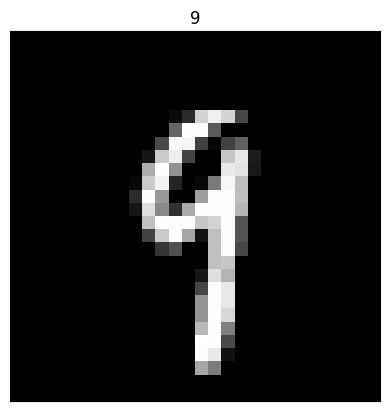

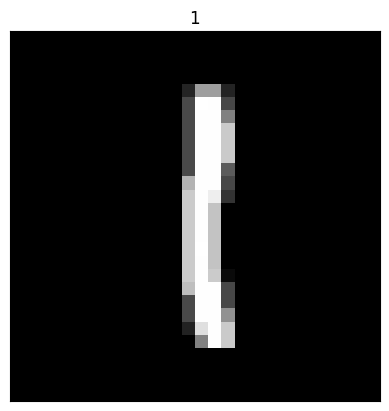

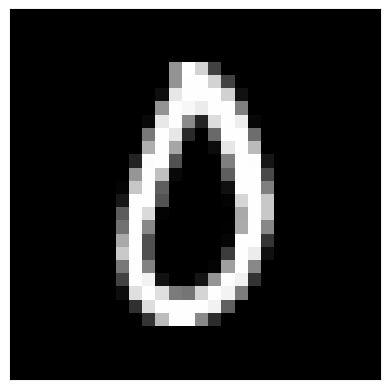

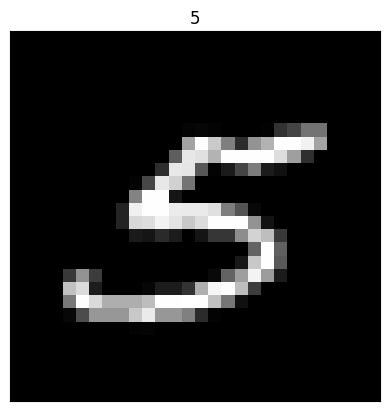

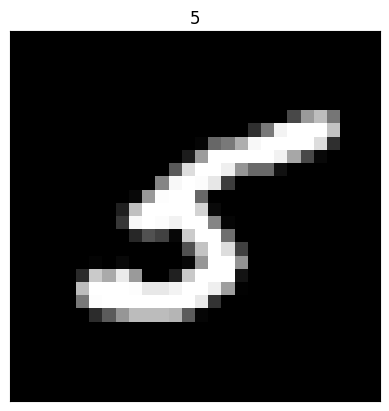

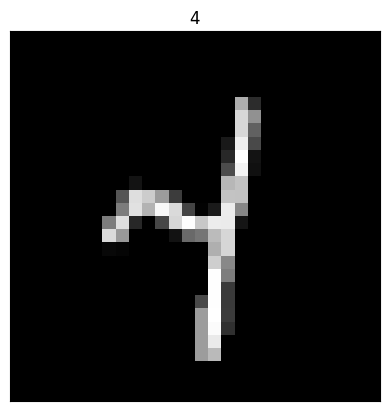

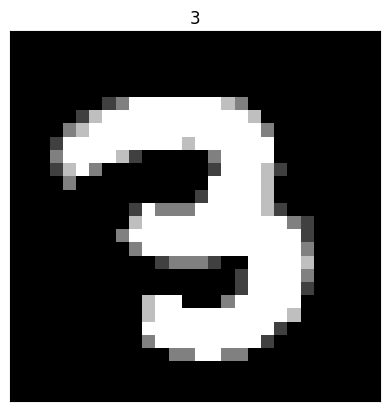

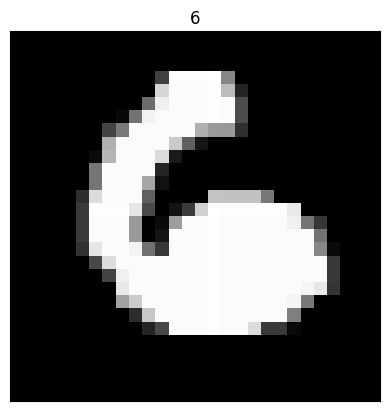

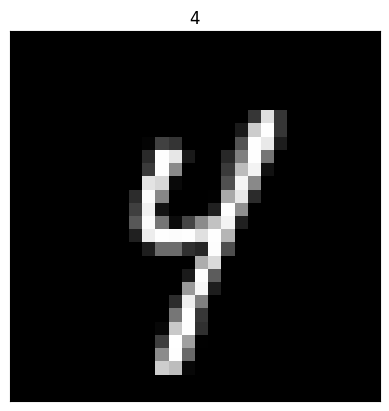

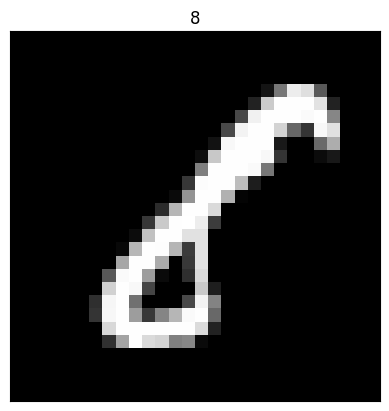

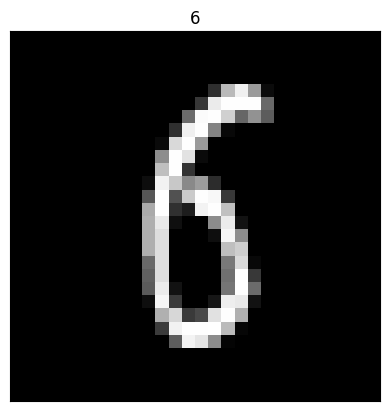

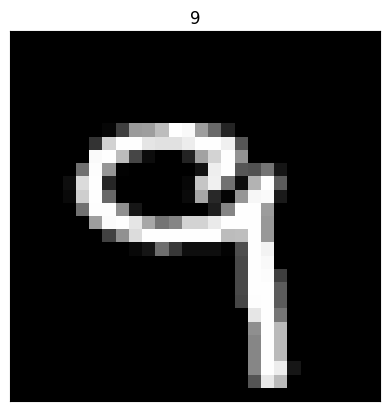

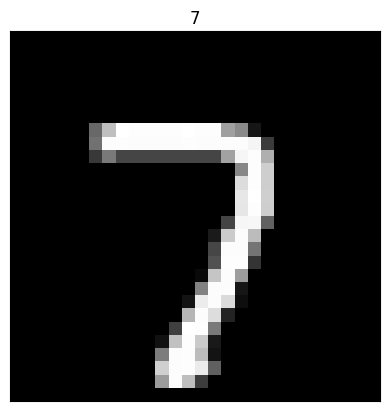

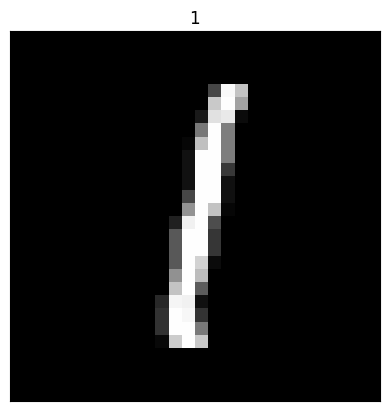

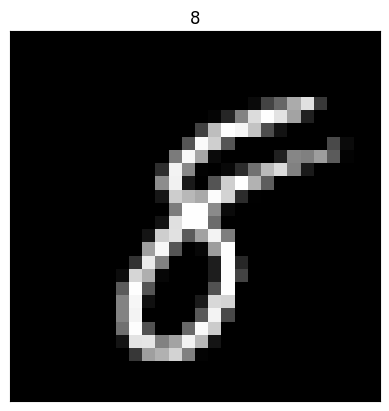

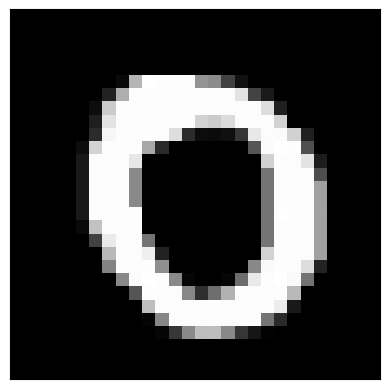

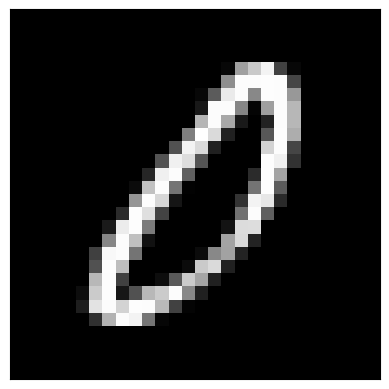

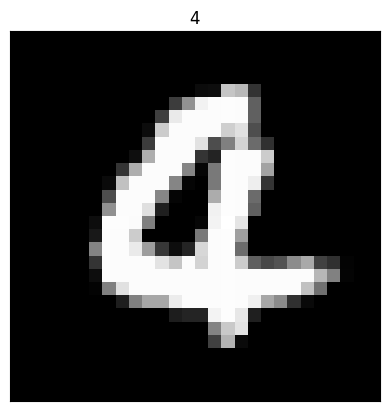

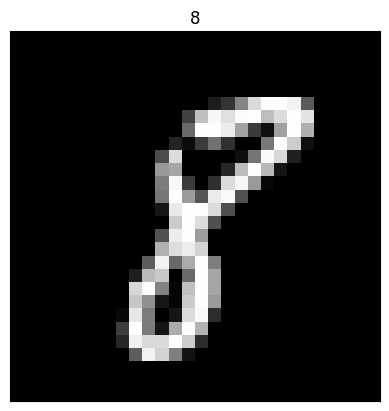

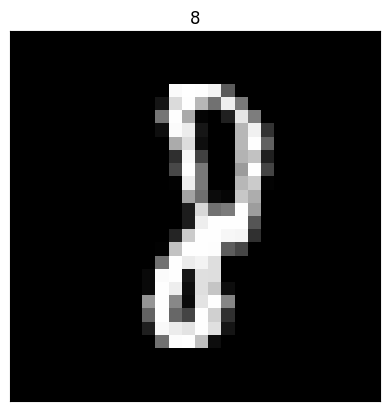

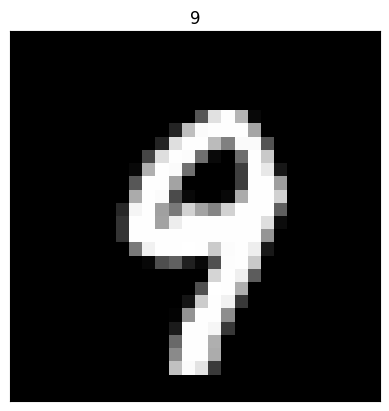

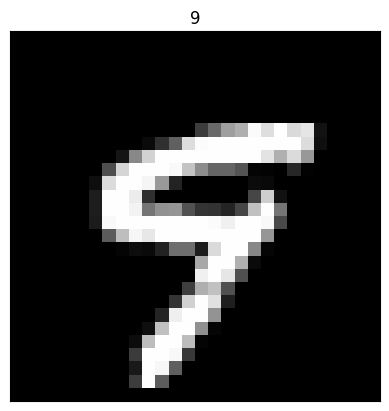

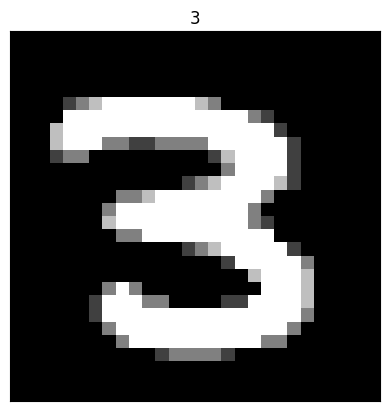

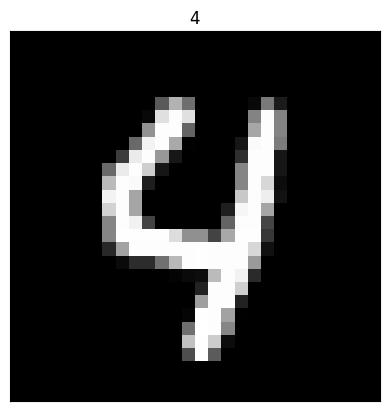

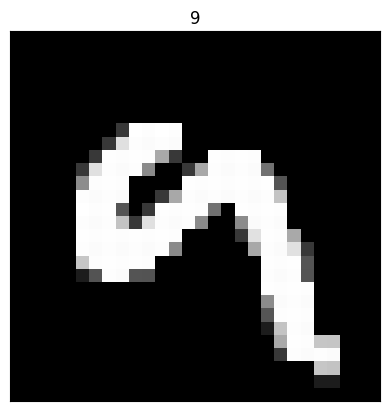

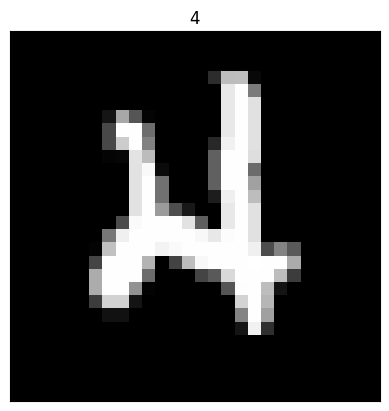

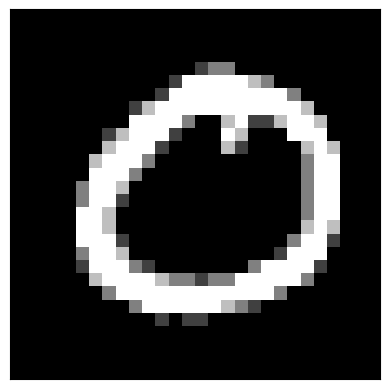

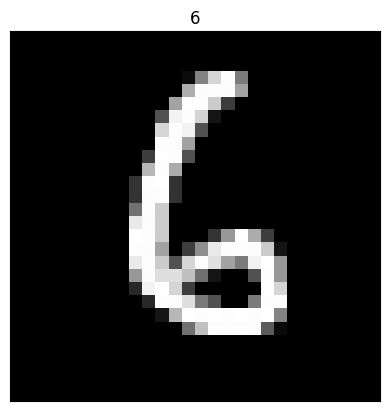

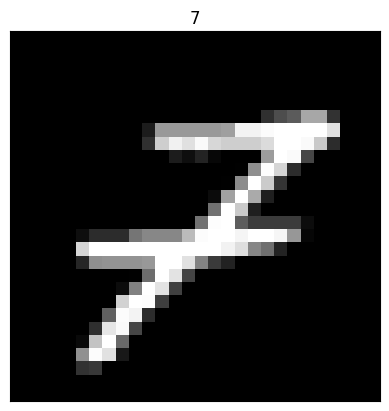

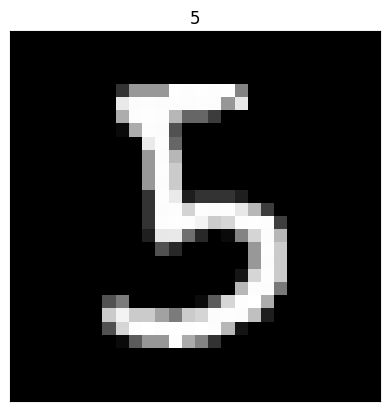

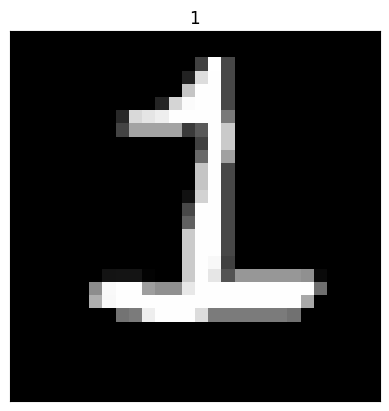

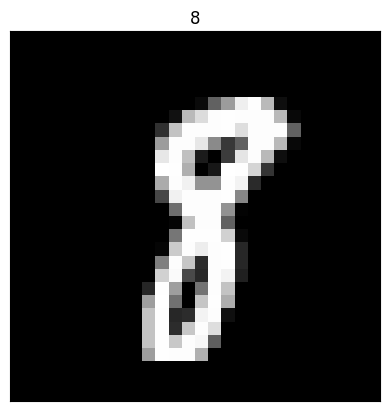

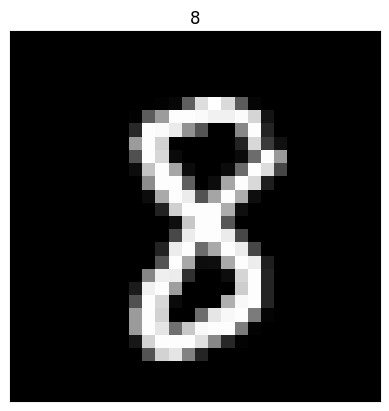

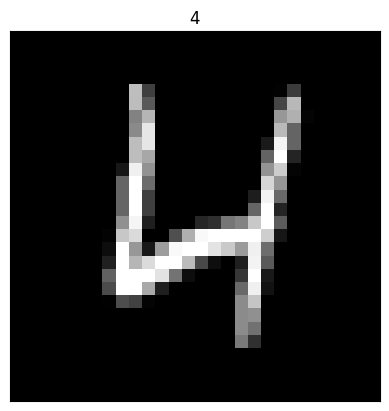

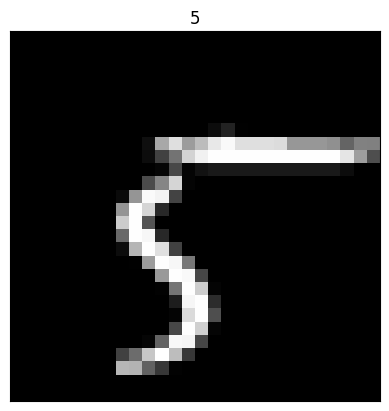

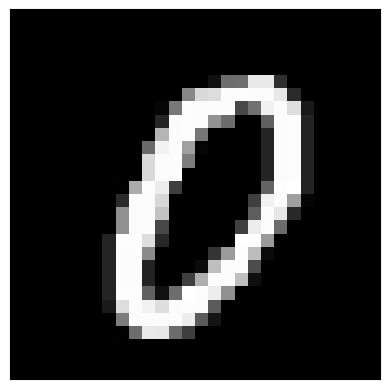

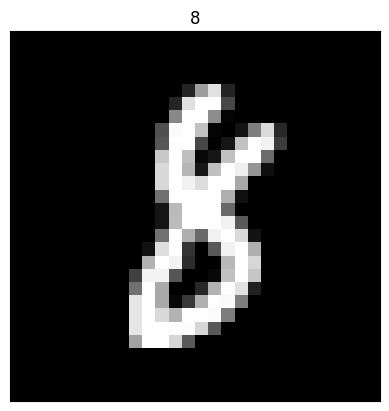

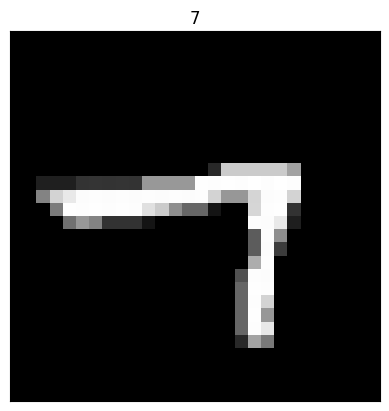

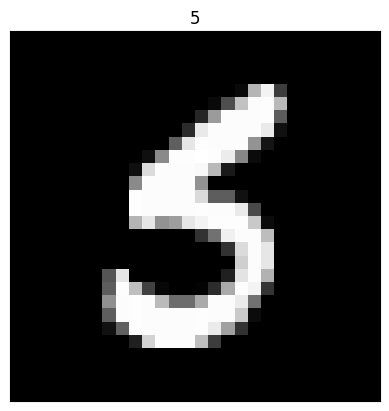

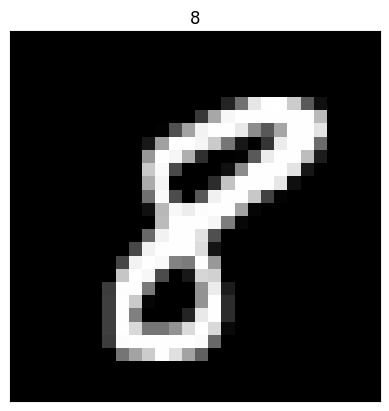

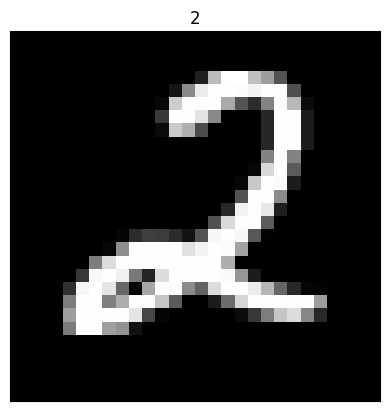

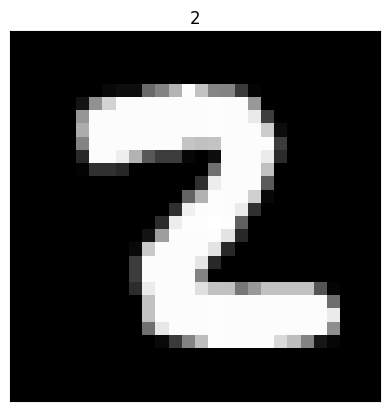

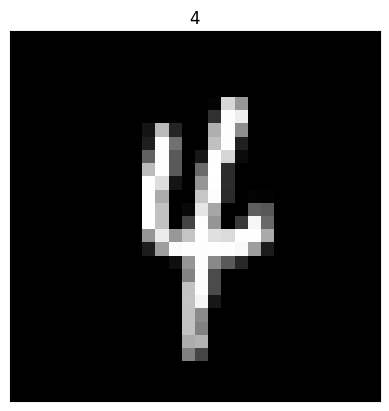

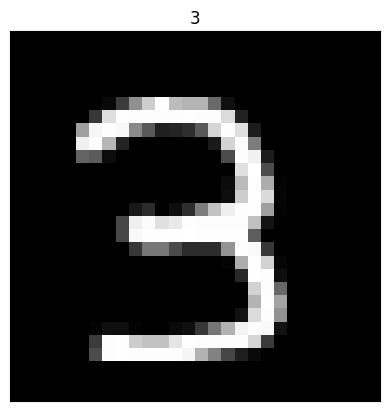

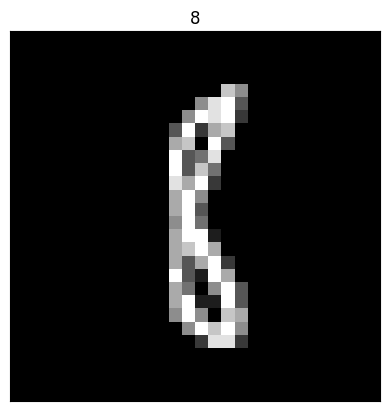

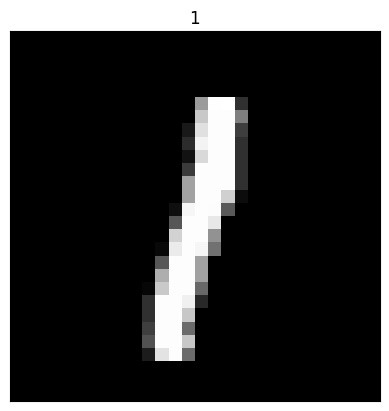

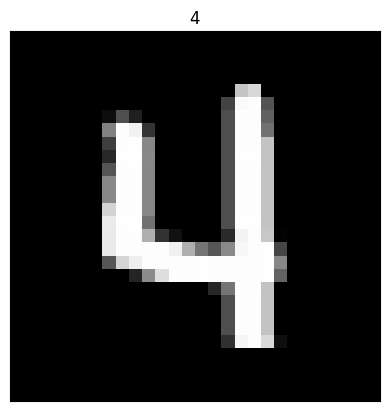

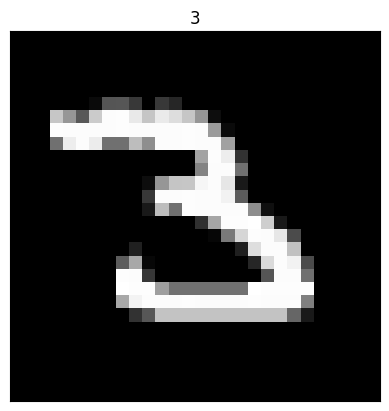

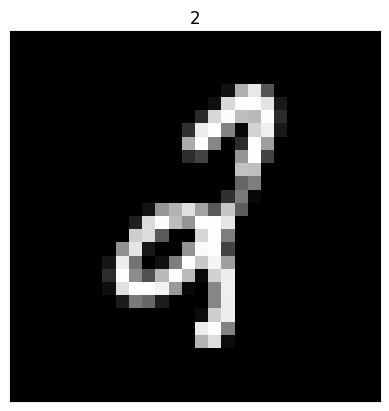

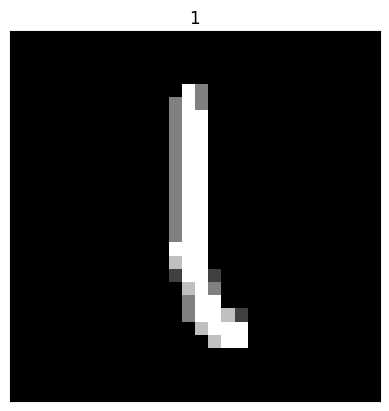

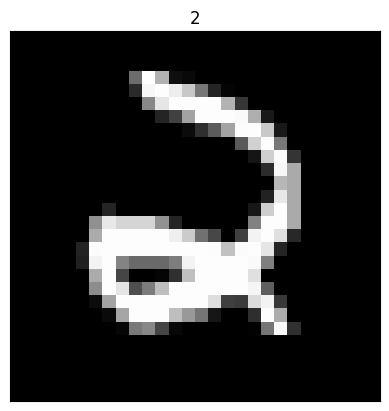

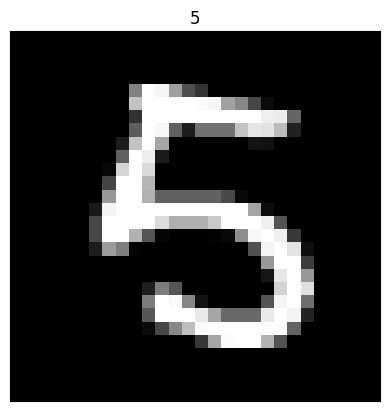

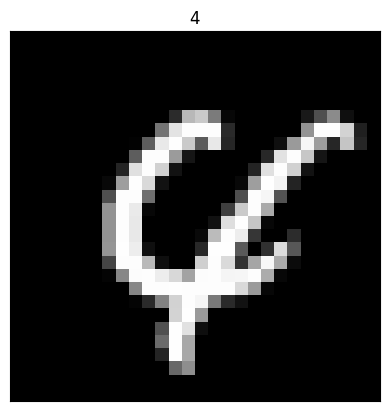

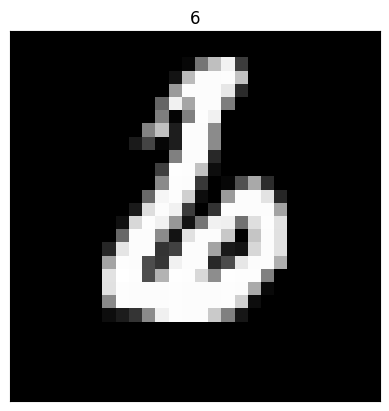

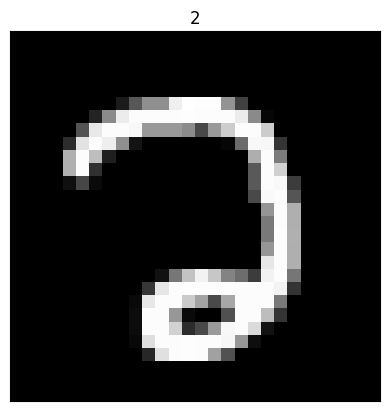

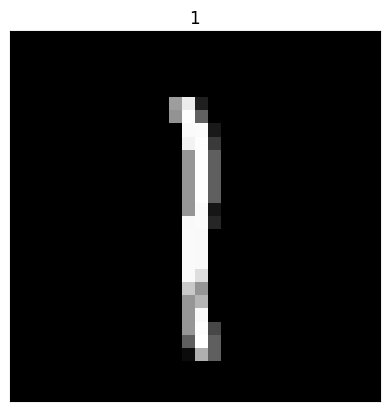

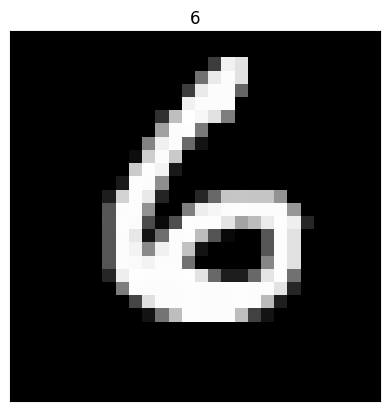

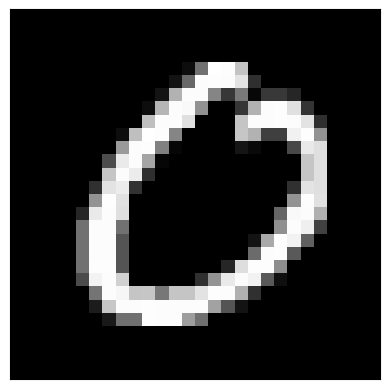

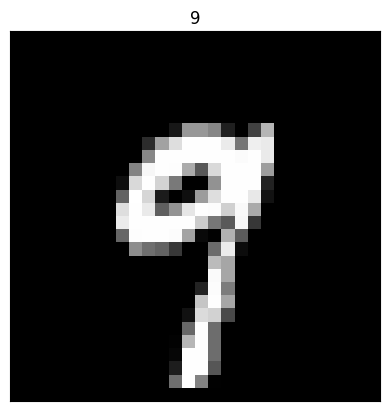

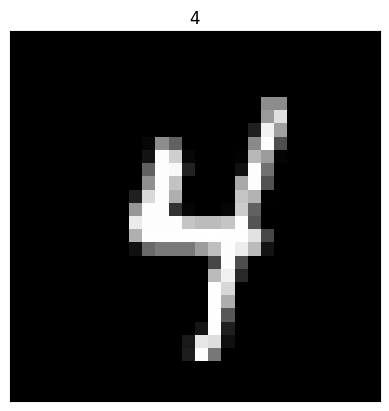

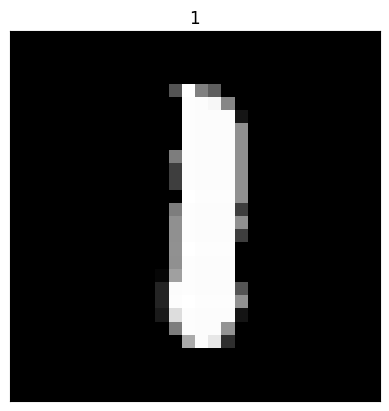

(64, 1, 28, 28)


In [14]:
for i in train_loader:
    print(i.shape)
    break